# Sentiment Analysis

In [68]:
# nltk imports
import nltk

In [69]:
import string
import numpy as np
import os

basePath = os.path.abspath('') + "\\"

In [70]:
file = "D:\\projects\\sentiment-analysis-nlp\\datasets\\sentiment_labelled_sentences\\full_set.txt"
with open(file) as f:
    content = f.readlines()

content[0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n']

## Preprocessing

**Text preprocessing** is traditionally an important step for natural language processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The various Text Preprocesing steps are -
* Tokenization - Splitting the sentence into words.
* Lower casing
* Stopwords removal - Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.
* Stemming: It is a process of transforming a word to its root form.

### 1. Extracting sentences and creating labels from dataset

In this step, we are cleaning our dataset. This is the first step of preprocessing. Sentences are a collection of words that end with a punctuation. We are extracting individual sentences from a review and creating labels for them

In [71]:
# Removing white spaces
content = [x.strip() for x in content]

# Separating sentences from labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

In [72]:
sentences[0:10]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.']

In [73]:
labels[0:10]

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0']

In [74]:
'''
Transforming the labels to go from -1 to 1, instead of 0 to 1
-1 represents negative, +1 represents positive
'''

y = np.array(labels, dtype='int8')
y = 2*y - 1
y

array([-1,  1,  1, ..., -1, -1, -1], dtype=int8)

### 2. Removing extras - stopwords, digits, punctuation

Here, we are removing all the non-essential parts in our sentences. Digits and punctuation do not contribute to the sentiment of the sentence and are thus being removed.
We are also removing stopwords from the sentence. For stopwords, we have defined our own set of stopwords rather than taking from a corpus. This is done to prevent the reduction fo reviews to mere words that are useless to the application

In [75]:
def remove_elements(x, removal_list):
    for z in removal_list:
        x = x.replace(z, ' ')
    return x

# Removing digits
digit_list = [str(x) for x in range(10)]
digits_removed = [remove_elements(x, digit_list) for x in sentences]

# Removing punctuations
punctuations_removed = [remove_elements(x, string.punctuation) for x in digits_removed]

# Converting to lower case and removing whitespaces
sentences = [x.lower() for x in punctuations_removed]
sentences = [x.strip() for x in sentences]

# Removing stopwords
def remove_stopwords(stopword, text):
    new_text = ' '.join([word for word in text.split() if word not in stopword])
    return new_text

# Defining our own set of stopwords
stop_set = ['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
preprocessed = [remove_stopwords(stop_set, x) for x in sentences]

In [76]:
preprocessed[0:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time']

### Stemming (removed)

In [77]:
def porter_stemmer(words):
    porter = nltk.PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    return stemmed

stemmed_sentences = [porter_stemmer(words.split()) for words in preprocessed]
stemmed_sentences = [" ".join(i) for i in stemmed_sentences]
stemmed_sentences[0:10]

['so there is no way for me plug in here in us unless go by convert',
 'good case excel valu',
 'great for jawbon',
 'tie charger for convers last more than minut major problem',
 'mic is great',
 'have jiggl plug get line up right get decent volum',
 'if you have sever dozen or sever hundr contact then imagin fun send each them one by one',
 'if you are razr owner you must have thi',
 'needless say wast my money',
 'what wast money and time']

## 2. TF/IDF

This is a measure of the relative importance of a word within a document, in the context of multiple documents. In our case here, multiple reviews.
We start with the TF part — this is simply a normalized frequency of the word in the document:  
`(word count in document) / (total words in document)`

The IDF is a weighting of the uniquess of the word across all of the documents. Here is the complete formula of TF/IDF:  
`td_idf(t,d) = wc(t,d)/wc(d) / dc(t)/dc()`
where:
* `wc(t,d)` = # of occurrences of term t in doc d
* `wc(d)` = # of words in doc d
* `dc(t)` = # of docs that contain at least 1 occurrence of term t
* `dc()` = # of docs in collection

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer(analyzer="word",
                             preprocessor=None,
                             stop_words='english',
                             max_features=6000,
                             ngram_range=(1,5))

date_features = vectorizer.fit_transform(preprocessed)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(date_features)
data_matrix = data_features_tfidf.toarray()
data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 3. Creating Training and Test Sets

In [79]:
np.random.seed(0)
test_index = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False),
                       np.random.choice((np.where(y==1))[0], 250, replace=False))
train_index = list(set(range(len(labels))) - set(test_index))

train_data = data_matrix[train_index,]
train_labels = y[train_index]

test_data = data_matrix[test_index,]
test_labels = y[test_index]

## 4. Finding Polarity and Subjectivity (TextBlob)

**TextBlob**: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence.
The TextBlob module allows us to take advantage of these labels. TextBlob finds all the words and phrases that it can assign polarity and subjectivity to, and average all of them together

**Sentiment Labels**: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we’re going to ignore them for now). A corpus’ sentiment is the average of these.
* **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
* **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [80]:
from textblob import TextBlob

## Creating polarity and subjectivity functions

polarity_function = lambda x: TextBlob(x).sentiment.polarity
subjectivity_function = lambda x: TextBlob(x).sentiment.subjectivity
polarity_list = [polarity_function(x) for x in preprocessed]
subjectivity_list = [subjectivity_function(x) for x in preprocessed]

In [81]:
polarity_list[0:10]

[0.0,
 0.85,
 0.8,
 0.1875,
 0.8,
 0.22619047619047616,
 0.09999999999999999,
 0.0,
 -0.35,
 -0.2]

In [82]:
subjectivity_list[0:10]

[0.0,
 0.8,
 0.75,
 0.3333333333333333,
 0.75,
 0.6011904761904762,
 0.06666666666666667,
 0.0,
 0.5,
 0.0]

## 5. Logistic Regression

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable. Logistic Regression is used when the dependent variable(target) is categorical.

**Types of Logistic Regression:**

* **Binary Logistic Regression**: The categorical response has only two 2 possible outcomes. eg. True or false
* **Multinomial Logistic Regression**: Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)
* **Ordinal Logistic Regression**: Three or more categories with ordering. Example: Movie rating from 1 to 5.

**Decision Boundary**

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.

**SGDClassifier**

Incrementally trained logistic regression. This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter.

In [83]:
from sklearn.linear_model import SGDClassifier

## Fitting classifier on training data
classifier = SGDClassifier(loss="log", penalty="none")
classifier.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = classifier.coef_[0, :]
b = classifier.intercept_

## Get predictions on training and test data
predictions_train = classifier.predict(train_data)
predictions_test = classifier.predict(test_data)

## Computing errors
error_training = np.sum((predictions_train > 0.0 ) != (train_labels > 0.0))
error_testing = np.sum((predictions_test > 0.0) != (test_labels > 0.0))

training_error = float(error_training) / len(train_labels)
testing_error = float(error_testing) / len(test_labels)

In [84]:
training_error

0.0136

In [85]:
testing_error

0.186

# 6. Finding words with strong influence

In [86]:
## Converting vocabulary into a list
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])

## Getting indices by sorting w
indices = np.argsort(w)

## Words with large negative value
negative_indices = indices[0:50]
negative_words = [str(x) for x in list(vocab[negative_indices])]

positive_indices = indices[-49:-1]
positive_words = [str(x) for x in list(vocab[positive_indices])]

In [87]:
print(negative_words)

['worst', 'sucks', 'poor', 'bad', 'bland', 'disappointing', 'disappointment', 'failed', 'horrible', 'avoid', 'unfortunately', 'slow', 'return', 'rude', 'wasted', 'wasn', 'mediocre', 'flat', 'fly', 'junk', 'appealing', 'stupid', 'tasteless', 'doesn', 'average', 'ok', 'awful', 'terrible', 'dropped', 'ripped', 'garbage', 'disgusting', 'crap', 'mistake', 'sucked', 'waste', 'fails', 'torture', 'dirty', 'par', 'blah', 'pg', 'waste time', 'probably', 'hell', 'improvement', 'selection food', 'cheap', 'att', 'hour']


In [88]:
print(positive_words)

['really good', 'brilliant', 'treat', 'highly recommend', 'entertaining', 'performance', 'decor', 'reasonable', 'friendly', 'favorite', 'fall', 'plus', 'fast', 'joy', 'cast', 'predictable bad', 'haven', 'audio', 'definately', 'fun', 'rocks', 'incredible', 'fabulous', 'perfectly', 'fantastic', 'wonderful', 'best', 'hand', 'bacon', 'comfortable', 'amazing', 'assure', 'awesome', 'cool', 'cooked', 'won disappointed', 'pleased', 'liked', 'beautiful', 'works', 'interesting', 'excellent', 'delicious', 'enjoyed', 'perfect', 'loved', 'nice', 'love']


## Making a WordCloud

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_wc = WordCloud(background_color="white",
               colormap="Dark2",
               max_font_size=150,
               random_state=42)

negative_wc = WordCloud(background_color="white",
               colormap="Dark2",
               max_font_size=150,
               random_state=42)

positive_wc.generate(" ".join(positive_words))
negative_wc.generate(" ".join(negative_words))

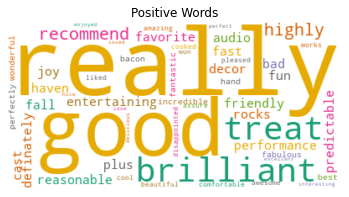

In [90]:
plt.imshow(positive_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words")
plt.show()

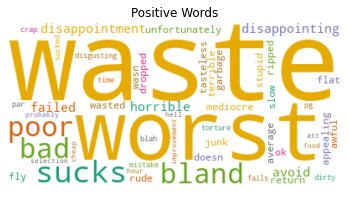

In [91]:
plt.imshow(negative_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words")
plt.show()

**Making a function to test on custom reviews**

In [92]:
list_reviews = [
    ["It's a sad movie but very good"],
    ["Waste of my time"],
    ["It is not what like"],
    ["It is not what I m looking for"]
]

polarity_index = {-1 : "negative",  0 : "neutral", 1 : "positive"}

def test_on_samples(my_classifier, list_of_reviews = list_reviews):
    sentiment_test_of_reviews = []
    for x in list_of_reviews:
        sentiment = my_classifier.predict(vectorizer.transform(x))[0]
        sentiment_test_of_reviews.append(polarity_index[sentiment])
    return sentiment_test_of_reviews

## 7. Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

*Naive Bayes classifier for multinomial models*

* The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.

In [93]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(train_data, train_labels)

nb_predictions_test = nb_classifier.predict(test_data)
nb_error_testing = np.sum((nb_predictions_test > 0.0) != (test_labels > 0.0))
nb_error_testing = float(nb_error_testing) / len(test_labels)
nb_error_testing

0.178

In [94]:
## Testing the model trained of Naive Bayes

test_sentiments = test_on_samples(nb_classifier)
test_sentiments

['positive', 'negative', 'negative', 'positive']

## 8. SVM

__SVM__<br>
A _support vector machine_ (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

__Overview__
A support vector machine takes these data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: It will classify the elements on either side into two separate categories.  
__Kernel Trick__
Hyper planes take the form of a line only in the case of a 2D distribution. However th boudary ine formed may exist in different planes and dimesnions. Calculating these decision boundaries become very computation intensive as three number of dimensions increase. _Kernel Trick_ allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.


In [95]:
svm_classifier = SGDClassifier(loss="hinge", penalty="l2") #L2
svm_classifier.fit(train_data, train_labels)

svm_predict_test = svm_classifier.predict(test_data)
svm_error_test = np.sum((svm_predict_test > 0.0) != (test_labels > 0.0))
svm_error_test = float(svm_error_test) / len(test_labels)

svm_error_test

0.2

In [96]:
## Issue in Testing the model trained of SVM

test_sentiments = test_on_samples(svm_classifier, [["I would not recommend this movie"]])
test_sentiments

['positive']

In [97]:
## 9. LSTM Networks

## LSTM
LSTM stands for Long Short Term Memory networks. They are a modification of RNN: Recurrant Neural Networks.

## Preprocess
Here, we use numpy to convert the input text into a vector of specific length and pad empty spaces to make it fit a certain dimension.

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

max_review_length = 200

tokenizer = Tokenizer(num_words=10000,
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True)
tokenizer.fit_on_texts(preprocessed)

### Truncate and pad input sequences

X = tokenizer.texts_to_sequences(preprocessed)
X = sequence.pad_sequences(X, maxlen=max_review_length)
X.shape # Shape of data tensor

(3000, 200)

In [99]:
import pandas as pd

Y = pd.get_dummies(y).values
Y

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [100]:
## Generating testing and training data

np.random.seed(0)
test_indices = np.append(np.random.choice((np.where(y == -1))[0], 250, replace=False),
                         np.random.choice((np.where(y == 1))[0], 250, replace=False))
test_data = X[test_indices,]
test_labels = Y[test_indices]

training_indices = list(set(range(len(labels))) - set(test_indices))
training_data = X[training_indices,]
training_labels = Y[training_indices]

## Neural Network
As observed above, we convert the text into a vector of length 200 and use it as an input for the neural network. Here, we also define the neural network architecture.
The model is of Sequential type and uses 2 LSTM layers with finally a dense layer with softmax activation.

## Layers
- *Embedding*: Turns positive integers (indexes) into dense vectors of fixed size.
- *Spatial Dropout*: Help improve independence between feature maps.
- *LSTM*: Implements an LSTM layer
- *Dense*: Acts as a classification layer with the given activation function.

In [101]:
## Creating networks

EMBEDDING_DIM = 200
model = Sequential()
model.add(Embedding(10000, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(250, dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          2000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 200)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 250)          451000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               140400    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,591,602
Trainable params: 2,591,602
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
model.fit(training_data, training_labels,
          epochs=2,
          batch_size=40,
          validation_split=0.1)

Epoch 1/2
57/57 [==============================] - 47s 832ms/step - loss: 0.6519 - accuracy: 0.6018 - val_loss: 0.5814 - val_accuracy: 0.6960
Epoch 2/2
57/57 [==============================] - 118s 2s/step - loss: 0.3450 - accuracy: 0.8667 - val_loss: 0.5419 - val_accuracy: 0.7520


In [103]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2, batch_size=40)
print(f"loss: {loss}")
print(f"Validation accuracy: {acc}")

13/13 - 5s - loss: 0.4242 - accuracy: 0.8220
loss: 0.42422497272491455
Validation accuracy: 0.8220000267028809


## Model Output
As observable, the model output is a tuple of 2 numbers which was the output dimension of the last, Dense layer. The Softmax layer converted two real positive/negative numbers into the probability of their occurrence and hence the 2 probabilities. The training of the model determines the tipping point for the classification.

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def call_on_vader(review):
    vader = SentimentIntensityAnalyzer()
    vader_score = vader.polarity_scores(review)
    if vader_score["pos"] > 0 and vader_score["pos"] > vader_score["neg"]:
        return vader_score, "Positive"
    elif vader_score["neg"] > 0 and vader_score["neg"] > vader_score["pos"]:
        return vader_score, "Negative"
    else:
        return vader_score, "Neutral"
    

outcome_label = ['Negative', 'Positive']
def decide_review(review):
    seq = tokenizer.texts_to_sequences([review])
    padded = sequence.pad_sequences(seq, maxlen=max_review_length)
    predict = model.predict(padded)
    if 0.4 < predict[0][0] < 0.6:
        vader_score, sentiment = call_on_vader(review)
        print(vader_score)
        print(sentiment)
    else:
        print("Probability Distribution : ", predict)
        print(outcome_label[np.argmax(predict)])

In [105]:
decide_review("It is not what I am looking for")

Probability Distribution :  [[0.978914   0.02108598]]
Negative


In [106]:
decide_review("This isn't what I am looking for")

Probability Distribution :  [[0.8631402  0.13685979]]
Negative


In [107]:
decide_review("This is perfect")

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
Positive


In [108]:
decide_review("This is really good")

Probability Distribution :  [[0.13859054 0.8614095 ]]
Positive


In [109]:
decide_review("I might not need this")

Probability Distribution :  [[0.96276003 0.03723998]]
Negative


In [111]:
decide_review("I drank lots of water")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral
